## 6. Convergence of Random Variables

Convergence in Probability:

We'll generate sequences of random numbers where the variance decreases over time. This should result in the sequences getting closer to a fixed number (e.g., 0).

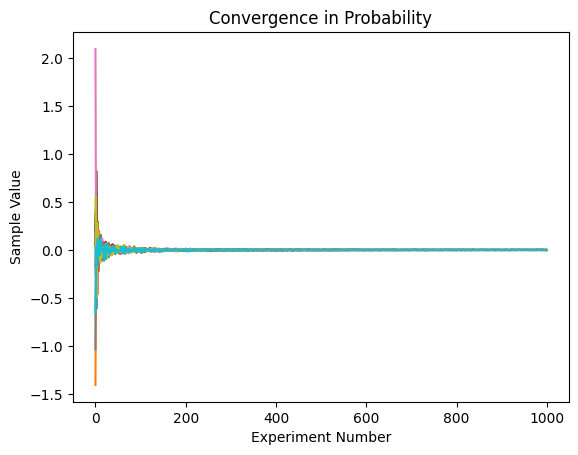

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_experiments = 1000

# Plotting 10 sequences for illustration
for _ in range(10):
    samples = [np.random.normal(0, 1.0 / (i + 1)) for i in range(n_experiments)]
    plt.plot(samples)

plt.xlabel('Experiment Number')
plt.ylabel('Sample Value')
plt.title('Convergence in Probability')
plt.show()


Convergence in Distribution:

We'll simulate the spinning wheel example. Initially, the wheel is biased, but it gets fairer over time.


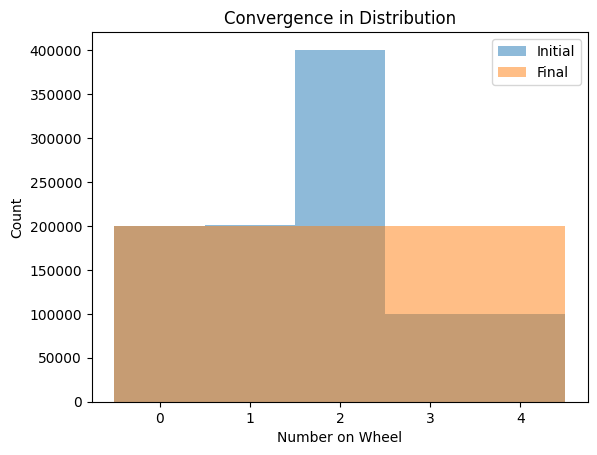

In [11]:
# Initial probabilities are biased
initial_probs = [0.2, 0.2, 0.4, 0.1, 0.1]

# Over time, the probabilities converge to a fair wheel
final_probs = [0.2, 0.2, 0.2, 0.2, 0.2]

n_spins = 1000000

outcomes_initial = np.random.choice(5, size=n_spins, p=initial_probs)
outcomes_final = np.random.choice(5, size=n_spins, p=final_probs)

plt.hist(outcomes_initial, bins=np.arange(6) - 0.5, alpha=0.5, label='Initial')
plt.hist(outcomes_final, bins=np.arange(6) - 0.5, alpha=0.5, label='Final')
plt.xlabel('Number on Wheel')
plt.ylabel('Count')
plt.title('Convergence in Distribution')
plt.legend()
plt.show()


Convergence in Quadratic Mean:

We'll simulate the basketball player's shots. Initially, the shots are both inaccurate and inconsistent. Over time, they become more accurate and consistent.


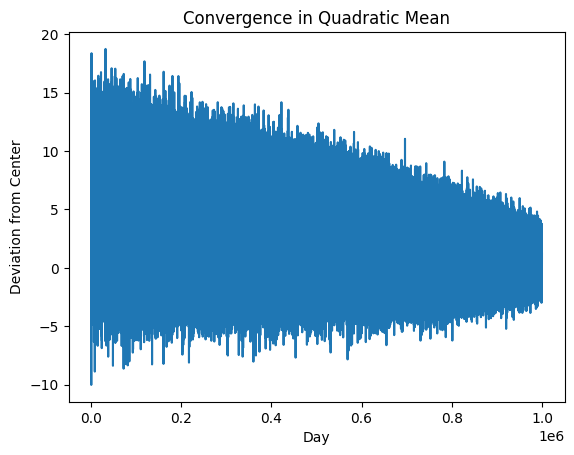

In [10]:
n_days = 1000000

# Day 1: Mean deviation is 5, variance is 10
# Day 1000000: Mean deviation is 0.5, variance is 1
means = np.linspace(5, 0.5, n_days)
variances = np.linspace(10, 1, n_days)

samples = [np.random.normal(mu, np.sqrt(var)) for mu, var in zip(means, variances)]

plt.plot(samples)
plt.xlabel('Day')
plt.ylabel('Deviation from Center')
plt.title('Convergence in Quadratic Mean')
plt.show()


### 6.2 Types of convergence

**$X_n$ converges to $X$ in probability**, written $X_n \xrightarrow{\text{P}} X$, if, for every $\epsilon > 0$,:

$$ \mathbb{P}( |X_n - X| > \epsilon ) \rightarrow 0 $$

as $n \rightarrow \infty$.

**$X_n$ converges to $X$ in distribution**, written $X_n \leadsto X$, if

$$ \lim _{n \rightarrow \infty} F_n(t) = F(t) $$

for all $t$ for which $F$ is continuous.

**$X_n$ converges to $X$ in quadratic mean**, written $X_n \xrightarrow{\text{qm}} X$, if,

$$ \mathbb{E}(X_n - X)^2 \rightarrow 0 $$

as $n \rightarrow \infty$.

**Theorem 6.4**.  The following relationships hold:

1. $X_n \xrightarrow{\text{qm}} X$ implies that $X_n \xrightarrow{P} X$.

2. $X_n \xrightarrow{\text{P}} X$ implies that $X_n \leadsto X$.

3. if $X_n \leadsto X$ and if $\mathbb{P}(X = c) = 1$ for some real number $c$, then $X_n \xrightarrow{\text{P}} X$.

**Proof**

1. Fix $\epsilon > 0$. Using Chebyshev's inequality,

$$ \mathbb{P}(|X_n - X| > \epsilon) = \mathbb{P}(|X_n - X|^2 < \epsilon^2) \leq \frac{\mathbb{E}|X_n - X|^2}{\epsilon^2} \rightarrow 0 $$ 

2. Fix $\epsilon > 0$ and let $x$ be a point of continuity of $F$.  Then

$$
\begin{align}
F_n(x) & = \mathbb{P}(X_n \leq x) = \mathbb{P}(X_n \leq x, X \leq x + \epsilon) + \mathbb{P}(X_n \leq x, X > x + \epsilon) \\
       & \leq \mathbb{P}(X \leq x + \epsilon) + \mathbb{P}(|X_n - X| > \epsilon) \\
       & = F(x + \epsilon) + \mathbb{P}(|X_n - X| > \epsilon)
\end{align}
$$

Also,

$$
\begin{align}
F(x - \epsilon) & = \mathbb{P}(X \leq x - \epsilon) = \mathbb{P}(X \leq x - \epsilon, X_n \leq x) + \mathbb{P}(X \leq x + \epsilon, X_n > x) \\
                & \leq F_n(x) + \mathbb{P}(|X_n - X| > \epsilon)
\end{align}
$$

Hence,

$$ F(x - \epsilon) - \mathbb{P}(|X_n - X| > \epsilon) \leq F_n(x) \leq F_n(x + \epsilon) + \mathbb{P}(|X_n - X| > \epsilon) $$

Take the limit as $n \rightarrow \infty$ to conclude that

$$ F(x - \epsilon) \leq \liminf_{n \rightarrow \infty} F_n(x) \leq \limsup_{n \rightarrow \infty} F_n(x) \leq F(x + \epsilon) $$

3. Fix $\epsilon > 0$. Then,

$$
\begin{align}
\mathbb{P}(|X_n - c| > \epsilon) & = \mathbb{P}(X_n < c - \epsilon) + \mathbb{P}(X_n > c + \epsilon) \\
                                 & \leq \mathbb{P}(X_n \leq c - \epsilon) + \mathbb{P}(X_n > c + \epsilon) \\
                                 & = F_n(c - \epsilon) + 1 - F_n(c + \epsilon) \\
                                 & \rightarrow F(c - \epsilon) + 1 - F(c + \epsilon) \\
                                 & = 0 + 1 - 1 = 0
\end{align}
$$

Now, to show that the reverse implications do not hold:

#### Convergence in probability does not imply convergence in quadratic mean

Let $U \sim \text{Unif}(0, 1)$, and let $X_n \sim \sqrt{n} I_{(0, 1 / n)}(U)$.  Then $\mathbb{P}(|X_n| > \epsilon) = \mathbb{P}(\sqrt{n} I_{(0, 1 / n)}(U) > \epsilon) = \mathbb{P}(0 \leq U < 1/n) = 1/n \rightarrow 0$.  Hence, then $X_n \xrightarrow{\text{P}} 0$.  But $\mathbb{E}(X_n^2) = n \int_0^{1/n} du = 1$ for all $n$ so $X_n$ does not converge in quadratic mean.

#### Convergence in distribution does not imply convergence in probability

Let $X \sim N(0, 1)$.  Let $X_n = -X$ for $n = 1, 2, 3, \dots$; hence $X_n \sim N(0, 1)$.  $X_n$ has the same distribution as $X$ for all $n$ so, trivially, $\lim _n F_n(x) \rightarrow F(x)$ for all $x$.  Therefore, $X_n \leadsto X$.  But $\mathbb{P}(|X_n - X| > \epsilon) = \mathbb{P}(|2X| > \epsilon) \neq 0$.  So $X_n$ does not tend to $X$ in probability.

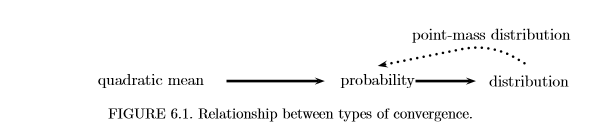

**Theorem 6.5** Let $X_n, X, Y_n, Y$ be random variables.  Let $g$ be a continuous function.  Then:

1. If $X_n \xrightarrow{\text{P}} X$ and $Y_n \xrightarrow{\text{P}} Y$, then $X_n + Y_n \xrightarrow{\text{P}} X + Y$.
2. If $X_n \xrightarrow{\text{qm}} X$ and $Y_n \xrightarrow{\text{qm}} Y$, then $X_n + Y_n \xrightarrow{\text{qm}} X + Y$.
3. If $X_n \leadsto X$ and $Y_n \leadsto c$, then $X_n + Y_n \leadsto X + c$.
4. If $X_n \xrightarrow{\text{P}} X$ and $Y_n \xrightarrow{\text{P}} Y$, then $X_n Y_n \xrightarrow{\text{P}} XY$.
5. If $X_n \leadsto X$ and $Y_n \leadsto c$, then $X_n Y_n \leadsto cX$.
6. If $X_n \xrightarrow{\text{P}} X$ then $g(X_n) \xrightarrow{\text{P}} g(X)$ .
7. If $X_n \leadsto X$ then $g(X_n) \leadsto g(X)$.

### 6.3 The Law of Large Numbers

**Theorem 6.6 (The Weak Law of Large Numbers (WLLN))**.  If $X_1, X_2, \dots, X_n$ are IID, then $\overline{X}_n \xrightarrow{\text{P}} \mu$.

**Proof**: Assume that $\sigma < \infty$.  This is not necessary but it simplifies the proof.  Using Chebyshev's inequality,

$$ \mathbb{P}(|\overline{X}_n - \mu| > \epsilon) \leq \frac{\mathbb{E}(|\overline{X}_n - \mu|^2)}{\epsilon^2} = \frac{\mathbb{V}(\overline{X}_n)}{\epsilon^2} = \frac{\sigma^2}{n \epsilon^2} $$

which tends to 0 as $n \rightarrow \infty$.

### 6.4 The Central Limit Theorem

**Theorem 6.8 (The Central Limit Theorem (CLT))**. Let $X_1, X_2, \dots, X_n$ be IID with mean $\mu$ and variance $\sigma^2$.  Let $\overline{X}_n = n^{-1}\sum_{i=1}^n X_i$.  Then

$$ Z_n \equiv \frac{\sqrt{n} \left( \overline{X}_n - \mu \right)}{\sigma} \leadsto Z $$

where $Z \sim N(0, 1)$.  In other words,

$$ \lim _{n \rightarrow \infty} \mathbb{P}(Z_n \leq z) = \Phi(z) = \int _{-\infty} ^z \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}dx$$

In addition to $Z_n \leadsto N(0, 1)$, there are several forms of notation to denote the fact that the distribution of $Z_n$ is converging to a Normal.  They all mean the same thing.  Here they are:

$$
\begin{align}
Z_n                                           & \approx N(0, 1) \\
\overline{X}_n                                & \approx N\left( \mu, \frac{\sigma^2}{n} \right)  \\
\overline{X}_n - \mu                          & \approx N\left( 0,   \frac{\sigma^2}{n} \right)  \\
\sqrt{n}(\overline{X}_n - \mu)                & \approx N\left( 0, \sigma^2 \right)              \\
\frac{\sqrt{n}(\overline{X}_n - \mu)}{\sigma} & \approx N(0, 1)
\end{align}
$$

The central limit theorem tells us that $Z_n = \sqrt{n}(\overline{X}_n - \mu)/\sigma$ is approximately $N(0, 1)$.  However, we rarely know $\sigma$.  We can estimate $\sigma^2$ from $X_1, X_2, \dots, X_n$ by

$$ S_n^2 = \frac{1}{n - 1} \sum_{i=1}^n ( X_i - \overline{X}_n )^2 $$

This raises the following question: if we replace $\sigma$ with $S_n$ is the central limit theorem still true?  The answer is yes.

**Theorem 6.10**.  Assume the same conditions as the CLT. Then,

$$ \frac{\sqrt{n} \left(\overline{X}_n - \mu \right)}{S_n} \leadsto N(0, 1)$$

You might wonder how accurate the normal approximation is.  The answer is given by the Berry-Essèen theorem.

**Theorem 6.11 (Berry-Essèen)**.  Suppose that $\mathbb{E}|X_1|^3 < \infty$.  Then

$$ \sup _z |\mathbb{P}(Z_n \leq z) - \Phi(z)| \leq \frac{33}{4} \frac{\mathbb{E}|X_1 - \mu|^3}{\sqrt{n}\sigma^3} $$

There is also a multivariate version of the central limit theorem.

**Theorem 6.12 (Multivariate central limit theorem)**.  Let $X_1, \dots, X_n$ be IID random vectors where

$$ X_i = \begin{pmatrix} X_{1i} \\ X_{2i} \\ \vdots \\ X_{ki} \end{pmatrix}$$

with mean

$$ \mu 
= \begin{pmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_k \end{pmatrix} 
= \begin{pmatrix} \mathbb{E}(X_{1i}) \\ \mathbb{E}(X_{2i}) \\ \vdots \\ \mathbb{E}(X_{ki}) \end{pmatrix} $$

and variance matrix $\Sigma$. Let

$$ \overline{X} = \begin{pmatrix} \overline{X}_1 \\ \overline{X}_2 \\ \vdots \\ \overline{X}_k \end{pmatrix}$$

where $\overline{X}_r = n^{-1} \sum_{i=1}^n X_{ri} $.  Then,

$$ \sqrt{n} (\overline{X} - \mu) \leadsto N(0, \Sigma) $$

### 6.5 The Delta Method

**Theorem 6.13 (The Delta Method)**.  Suppose that

$$ \frac{\sqrt{n}(Y_n - \mu)}{\sigma} \leadsto N(0, 1)$$

and that $g$ is a differentiable function such that $g'(u) \neq 0$.  Then

$$ \frac{\sqrt{n}(g(Y_n) - g(u))}{|g'(u)| \sigma} \leadsto N(0, 1)$$

In other words,

$$ Y_n \approx N \left( \mu, \frac{\sigma^2}{n} \right) \Rightarrow g(Y_n) \approx N \left( g(\mu), (g'(\mu))^2 \frac{\sigma^2}{n} \right) $$

**Theorem 6.15 (The Multivariate Delta method)**.  Suppose that $Y_n = (Y_{n1}, \dots, Y_{nk})$ is a sequence of random vectors such that

$$ \sqrt{n}(Y_n - \mu) \leadsto N(0, \Sigma) $$

Let $g : \mathbb{R}^k \rightarrow \mathbb{R}$ and let

$$ \nabla g = \begin{pmatrix} \frac{\partial g}{\partial y_1} \\ \vdots \\  \frac{\partial g}{\partial y_k} \end{pmatrix} $$

Let $\nabla_\mu$ denote $\nabla g(y)$ evaluated at $y = \mu$ and assume that the elements of $\nabla_\mu$ are non-zero.  Then

$$ \sqrt{n}(g(Y_n) - g(\mu)) \leadsto N(0, \nabla_\mu^T \Sigma \nabla_\mu) $$

### 6.6 Technical appendix

**$X_n$ converges to $X$ almost surely**, written $X_n \xrightarrow{\text{as}} X$, if

$$ \mathbb{P}(\{s : X_n(s) \rightarrow X(s)\}) = 1 $$

**$X_n$ converges to $X$ in $L_1$**, written $X_n \xrightarrow{L_1} X$, if

$$ \mathbb{E} |X_n - X| \rightarrow 0 $$

**Theorem 6.17**.  Let $X_n$ and $X$ be random variables.  Then:

1. $X_n \xrightarrow{\text{as}} X$ implies that $X_n \xrightarrow{\text{P}} X$.
2. $X_n \xrightarrow{\text{qm}} X$ implies that $X_n \xrightarrow{L_1} X$.
3. $X_n \xrightarrow{L_1} X$ implies that $X_n \xrightarrow{\text{P}} X$.

The weak law of large numbers says that $\overline{X}_n$ converges to $\mathbb{E} X$ in probability.  The strong law asserts that this is also true almost surely.

**Theorem 6.18 (The strong law of large numbers)**. Let $X_1, X_2, \dots, X_n$ be IID.  If $\mu = \mathbb{E}|X_1| < \infty$ then $\overline{X}_n \xrightarrow{\text{as}} \mu$.

A sequence is **asymptotically uniformly integrable** if

$$ \lim _{M \rightarrow \infty} \limsup _{n \rightarrow \infty} \mathbb{E} ( |X_n| I(|X_n| > M) ) = 0 $$

If $X_n \xrightarrow{\text{P}} b$ and $X_n$ is asymptotically uniformly integrable, then $\mathbb{E}(X_n) \rightarrow b$.

The **moment generating function** of a random variable $X$ is 

$$\psi_X(t) = \mathbb{E}(e^{tX}) = \int_u e^{tu} f_X(u) du$$

**Lemma 6.19**.  Let $Z_1, Z_2, \dots, Z_n$ be a sequence of random variables.  Let $\psi_n$ be the mgf of $Z_n$. Let $Z$ be another random variable and denote its mgf by $\psi$.  If $\psi_n(t) \rightarrow \psi(t)$ for all $t$ in some open interval around 0, then $Z_n \leadsto Z$.

#### Proof of the Central Limit Theorem

Let $Y_i = (X_i - \mu) / \sigma$.  Then, $Z_n = n^{-1/2} \sum_i Y_i$.  Let $\psi(t)$ be the mgf of $Y_i$.  The mgf of $\sum_i Y_i$ is $(\psi(t))^n$ and the mgf of $Z_n$ is $[\psi(t / \sqrt{n})]^n \equiv \xi_n(t)$.

Now $\psi'(0) = \mathbb{E}(Y_1) = 0$ and $\psi''(0) = \mathbb{E}(Y_1^2) = \mathbb{V}(Y_1) = 1$. So,

$$
\begin{align}
\psi(t) & = \psi(0) + t \psi'(0) + \frac{t^2}{2!} \psi''(0) + \frac{t^3}{3!} \psi'''(0) + \dots \\
        & = 1 + 0 + \frac{t^2}{2} +  \frac{t^3}{3!} \psi'''(0) + \ldots \\
        & = 1 + \frac{t^2}{2} +  \frac{t^3}{3!} \psi'''(0) + \ldots
\end{align}
$$

Now,

$$
\begin{align}
\xi_n(t) & = \left[ \psi \left( \frac{t}{\sqrt{n}} \right) \right] ^n \\
         & = \left[  1 + \frac{t^2}{2n} +  \frac{t^3}{3!n^{3/2}} \psi'''(0) + \ldots \right] ^n \\
         & = \left[  1 + \frac{\frac{t^2}{2} +  \frac{t^3}{3!n^{1/2}} \psi'''(0) + \ldots}{n} \right] ^n \\
         & \rightarrow e^{t^2/2}
\end{align}
$$

which is the mgf of $N(0, 1)$.  The resolt follows from the previous theorem.  In the last step we used the fact that, if $a_n \rightarrow a$, then

$$ \left( 1 + \frac{a_n}{n} \right) ^n \rightarrow e^a $$

### 6.8 Exercises

**Exercise 6.8.1.** Let $X_1, \dots, X_n$ be iid with finite mean $\mu = \mathbb{E}(X_i)$ and finite variance $\sigma^2 = \mathbb{V}(X_i)$.  Let $\overline{X}_n$ be the sample mean and let $S_n^2$ be the sample variance.

**(a)** Show that $\mathbb{E}(S_n^2) = \sigma^2$.

**Solution**: 

$S_n^2$ is the sample variance, that is, $ S_n^2 = (n-1)^{-1} \sum_{i=1}^n ( X_i - \overline{X}_n)^2 $.  Therefore:

$$
\begin{align}
\mathbb{E}[S_n^2] & = \mathbb{E}\left[ \frac {1}{n-1} \sum_{i=1}^n \left(X_i - \overline{X}_n \right)^2 \right] \\
& = \frac {1}{n-1} \mathbb{E} \left( \sum_{i=1}^n X_i^2 - 2 \overline{X}_n \sum_{i=1}^n X_i + \sum_{i=1}^n \overline{X}_n^2 \right) \\
& = \frac {1}{n-1} \mathbb{E} \left( \sum_{i=1}^n X_i^2 - 2 n \overline{X}_n^2 + n \overline{X}_n^2 \right) \\
& = \frac {n}{n-1} \left[ \mathbb{E} (X_i^2) - \mathbb{E} \overline{X}_n^2 \right] \\
& = \frac {n}{n-1} \left[ \left( \mu^2+\sigma^2 \right) - \left( \mu^2 + \frac {\sigma^2}{n} \right) \right] \\
& = \sigma^2
\end{align}
$$

**(b)** Show that $S_n^2 \xrightarrow{\text{P}} \sigma^2$.  

Hint: show that $S_n^2 = c_n n^{-1} \sum_{i=1}^n X_i^2 - d_n \overline{X}_n^2$ where $c_n \rightarrow 1$ and $d_n \rightarrow 1$.  Apply the law of large numbers to $n^{-1}\sum_{i=1}^n X_i^2$ and to $\overline{X}_n$.  Then use part (e) of Theorem 6.5.

**Solution**: 

Similar to derivation in **(a)** we have:

$$
\begin{align}
S_n^2 & = \frac {1}{n-1} \left( \sum_{i=1}^n X_i^2 - n \overline{X}_n^2 \right) \\
& = \frac{n}{n-1} \frac{1}{n} \sum_{i=1}^n X_i^2 - \frac{n}{n-1} \overline{X}_n^2 
\end{align}
$$

where $c_n = d_n = \frac{n}{n-1} \rightarrow 1$.

Applying the law of large numbers to $X_i^2$:

$$ n^{-1} \sum_{i=1}^n X_i^2 \xrightarrow{\text{P}} \mathbb{E}(X_i^2) = \sigma^2 + \mu^2$$


$$ \overline{X}_n \xrightarrow{\text{P}} \mathbb{E}(X_i) = \mu \Rightarrow \overline{X}_n^2 \xrightarrow{\text{P}} \mu^2 $$

Therefore, from theorem 6.5.e, $ S_n^2 = c_n n^{-1} \sum_{i=1}^n X_i^2 - d_n \overline{X}_n^2 \xrightarrow{\text{P}} \sigma^2 + \mu^2 - \mu^2 = \sigma^2$.

**Exercise 6.8.2.**  Let $X_1, X_2, \dots, X_n$ be a sequence of random variables.  Show that $X_n \xrightarrow{\text{qm}} b$ if and only if 

$$
\begin{equation}
\lim_{n \rightarrow \infty} \mathbb{E}(X_n) = b
\quad\mathrm{and}\quad 
\lim_{n \rightarrow \infty} \mathbb{V}(X_n) = 0
\end{equation}
$$

**Solution**:

$X_n \xrightarrow{\text{qm}} b$ id equivalent to:

$$
\begin{align}
\mathbb{E}[(X_n - b)^2]           & \rightarrow 0 \\
\mathbb{E}[X_n^2 - 2b X_n + b^2]  & \rightarrow 0 \\
\mathbb{E}[X_n^2] - 2b \mathbb{E}[X_n] + b^2 & \rightarrow 0 \\
\mathbb{E}[X_n^2] - 2b \mathbb{E}[X_n] + b^2 & \rightarrow 0 \\
\mathbb{V}[X_n] + (\mathbb{E}[X_n])^2 - 2b \mathbb{E}[X_n] + b^2  & \rightarrow 0
\end{align}
$$

If $\lim_{n \rightarrow \infty} \mathbb{V}[X_n] = 0$ and $\lim_{n \rightarrow \infty} \mathbb{E}[X_n] = b$, then

$$ 
\begin{align}
& \lim_{n \rightarrow \infty} \mathbb{E}[(X_n - b)^2] = \\
& = \lim_{n \rightarrow \infty} \mathbb{V}[X_n] + (\mathbb{E}[X_n])^2 - 2b \mathbb{E}[X_n] + b^2 \\
& = \lim_{n \rightarrow \infty} \mathbb{V}[X_n] + (\lim_{n \rightarrow \infty} \mathbb{E}[X_n])^2 - 2b \lim_{n \rightarrow \infty} \mathbb{E}[X_n] + b^2 \\
&= 0 + b^2 - 2b^2 + b^2 \\
&= 0
\end{align}
$$

On the other direction, if $X_n \xrightarrow{\text{qm}} b$, then

$$
\begin{align}
\lim_{n \rightarrow \infty} \mathbb{V}[X_n] + (\lim_{n \rightarrow \infty} \mathbb{E}[X_n])^2 - 2b \lim_{n \rightarrow \infty} \mathbb{E}[X_n] + b^2 &= 0 \\
\lim_{n \rightarrow \infty} \mathbb{V}[X_n] + (\lim_{n \rightarrow \infty} \mathbb{E}[X_n] - b)^2 &= 0 \\
\lim_{n \rightarrow \infty} \mathbb{V}[X_n - b] + \lim_{n \rightarrow \infty}  (\mathbb{E}[X_n - b])^2 &= 0
\end{align}
$$

Since both terms inside the limits are non-negative, the limits themselves are non-negative.  Two non-negative values add up to 0, so they must both be zero, and so we have:

$$
\begin{equation}
\lim_{n \rightarrow \infty} \mathbb{E}(Y_n) = 0
\quad\mathrm{and}\quad 
\lim_{n \rightarrow \infty} \mathbb{V}(Y_n) = 0
\end{equation}
$$

or, equivalently,

$$
\begin{equation}
\lim_{n \rightarrow \infty} \mathbb{E}(X_n) = b
\quad\mathrm{and}\quad 
\lim_{n \rightarrow \infty} \mathbb{V}(X_n) = 0
\end{equation}
$$

**Exercise 6.8.3**.  Let $X_1, X_2, \dots, X_n$ be iid and let $\mu = \mathbb{E}(X_i)$.  Suppose that variance is finite.  Show that $\overline{X}_n \xrightarrow{\text{qm}} \mu$.

**Solution**.

Let $Y_i = X_i - \mu$.  It has variance $\sigma_Y = \sigma$ and mean $\mu_Y = 0$. We have:

$$
\begin{align}
& \mathbb{E}[(\overline{X}_n - \mu)^2] = \\
& = \mathbb{E}\left[\left(\frac{1}{n} \sum_{i=1}^n (X_i - \mu) \right)^2\right] \\
& = \frac{1}{n^2} \mathbb{E} \left[ \left(\sum_{i=1}^n Y_i \right)^2 \right] \\
& = \frac{1}{n^2} \left( \sum_{i=1}^n \mathbb{E}[Y_i^2] - \sum_{i=1}^n \sum_{j=1, j \neq i}^n \mathbb{E}[Y_i Y_j] \right) \\
& = \frac{1}{n} \left( (\sigma_Y^2 + \mu_Y^2) - (n-1) \mu_Y^2 \right) \\
& = \frac{\sigma}{n}
\end{align}
$$

Therefore, $\lim _{n \rightarrow \infty} \mathbb{E}[(\overline{X}_n - \mu)^2] = \lim _{n \rightarrow \infty} \sigma / n = 0$, and so $\overline{X}_n \xrightarrow{\text{qm}} \mu$.

**Exercise 6.8.4**.  Let $X_1, X_2, \dots$ be a sequence of random variables such that

$$
\begin{equation}
\mathbb{P}\left(X_n = \frac{1}{n}\right) = 1 - \frac{1}{n^2}
\quad\mathrm{and}\quad 
\mathbb{P}\left(X_n = n\right) = \frac{1}{n^2}
\end{equation}
$$

Does $X_n$ converge in probability?  Doex $X_n$ converge in quadratic mean?

**Solution**.

For any distribution $X$, we have:

$$
\begin{align}
& \mathbb{P}( |X_n - X| > \epsilon ) = \\
&= \mathbb{P}\left( |X_n - X| > \epsilon \;\middle|\; X_n = \frac{1}{n} \right)\mathbb{P}\left(X_n = \frac{1}{n}\right)
  + \mathbb{P}\left( |X_n - X| > \epsilon \;\middle|\; X_n = n \right)\mathbb{P}\left(X_n = n\right) \\
&= \mathbb{P}\left( \middle|\frac{1}{n} - X\middle|\; > \epsilon \right)\left(1 - \frac{1}{n^2} \right)
  + \mathbb{P}\left( |n - X| > \epsilon \right)\frac{1}{n^2}
\end{align}
$$

Looking at the limit as $n \rightarrow \infty$,

$$ 
\begin{align}
& \lim _{n \rightarrow \infty} \mathbb{P}( |X_n - X| > \epsilon ) = \\
& = \lim _{n \rightarrow \infty} \mathbb{P}\left( \middle|\frac{1}{n} - X\middle|\; > \epsilon \right)\left(1 - \frac{1}{n^2} \right)
  + \lim _{n \rightarrow \infty} \mathbb{P}\left( |n - X| > \epsilon \right)\frac{1}{n^2} \\
& = \lim _{n \rightarrow \infty} \mathbb{P}\left( |X| > \epsilon \right)
\end{align}
$$

If we set $X = 0$, the limit above will be zero for any positive $\epsilon$ -- so we have $X_n \xrightarrow{\text{P}} 0$.

Now, for any quadratic mean potential convergence, we have:

$$
\begin{align}
& \mathbb{E}\left[(X_n - X)^2\right] = \\
& = \mathbb{E}\left[(X_n - X)^2 \bigg| X_n = \frac{1}{n} \right] \mathbb{P}\left(X_n = \frac{1}{n}\right)
   + \mathbb{E}\left[(X_n - X)^2 \big| X_n = n \right] \mathbb{P}\left(X_n = n\right) \\
& = \mathbb{E}\left[\left(X - \frac{1}{n}\right)^2  \right] \left(1 - \frac{1}{n^2}\right)
   + \mathbb{E}\left[(X - n)^2  \right] \frac{1}{n^2} \\
& = \mathbb{E}\left[X^2 - 2Xn^{-1} + n^{-2} \right] \left(1 - \frac{1}{n^2}\right)
   + \mathbb{E}\left[X^2 - 2Xn + n^2 \right] \frac{1}{n^2} \\
& = \mathbb{E}\left[X^2\right] + \mathbb{E}\left[X\right] \left(\frac{-2}{n} \left(1 - \frac{1}{n^2} \right) -\frac{2}{n}\right) + \frac{1}{n^2} \left(1 - \frac{1}{n^2} \right) + 1 \\
& = \mathbb{E}\left[X^2\right] - \mathbb{E}\left[X\right] \frac{2}{n} \left( 2 + \frac{1}{n^2} \right) + \frac{1}{n^2} \left(1 - \frac{1}{n^2} \right) + 1
\end{align}
$$

Taking the limit as $n \rightarrow \infty$,

$$
\begin{align}
& \lim _{n \rightarrow \infty} \mathbb{E}\left[(X_n - X)^2\right] = \\
& = 1 + \lim _{n \rightarrow \infty} \mathbb{E}\left[X^2\right] \\
& = 1 + \mathbb{E}\left[X^2\right] \\
& \geq 1
\end{align}
$$

so there is no distribution $X$ for which this value is 0, and so there is no quadratic mean convergence.

**Exercise 6.8.5**. Let $X_1, \dots, X_n \sim \text{Bernoulli}(p)$.  Prove that

$$
\begin{equation}
\frac{1}{n} \sum_{i=1}^n X_i^2 \xrightarrow{\text{P}} p
\quad\mathrm{and}\quad 
\frac{1}{n} \sum_{i=1}^n X_i^2 \xrightarrow{\text{qm}} p
\end{equation}
$$

**Solution**.

Given that quadratic mean convergence implies probability convergence, we only need to prove the second proposition.

Let $Y_i = X_i^2 - p$.  Then:

$$
\begin{align}
\mathbb{E}[Y_i] & = \\
& = \mathbb{E}[X_i^2] - p \\
& = \mathbb{V}[X_i] + \mathbb{E}[X_i]^2 - p \\
& = p(1-p) + p^2 - p \\
& = 0 \\
\mathbb{E}[Y_i^2] & = \\
& = \mathbb{V}[Y_i] + \mathbb{E}[Y_i]^2 \\
& = \mathbb{V}[X_i^2 - p] + 0^2 \\
& = \mathbb{V}[X_i^2] + 0^2 \\
& = \mathbb{V}[X_i]\\
& = p(1-p) \\
\mathbb{E}[Y_i Y_j] & = \text{(for independent variables)}\\
& = \mathbb{E}[Y_i] \mathbb{E}[Y_j] \\
& = 0
\end{align}
$$

$$
\begin{align}
& \mathbb{E}\left[\left(\left(\frac{1}{n} \sum_{i=1}^n X_i^2\right) - p\right)^2\right] = \\
& = \mathbb{E}\left[\left(\frac{1}{n} \sum_{i=1}^n \left(X_i^2 - p\right)\right)^2\right] \\
& = \frac{1}{n^2} \mathbb{E}\left[\left(\sum_{i=1}^n Y_i\right)^2\right] \\
& = \frac{1}{n^2} \mathbb{E}\left[\sum_{i=1}^n Y_i^2 - \sum_{i=1}^n \sum_{j=1, j \neq i}^n Y_i Y_j\right] \\
& = \frac{1}{n^2} \left( \sum_{i=1}^n \mathbb{E}\left[Y_i^2\right] - \sum_{i=1}^n \sum_{j=1, j \neq i}^n \mathbb{E}\left[ Y_i Y_j \right] \right) \\
& = \frac{p(1-p)}{n}
\end{align}
$$

So, as $n \rightarrow \infty$, this expectation goes to 0, and we have quadratic mean convergence.

**Exercise 6.8.6**.  Suppose that the height of men has mean 68 inches and standard deviation 4 inches.  We draw 100 men at random.  Find (approximately) the probability that the average height of men in our sample will be at least 68 inches.

**Solution**.

We assume all men's heights are measurements from iid variables $X_i$ with mean $\mu = 68$ and variance $\sigma^2 = 16$.

We need to approximate $\mathbb{P}(\overline{X}_{100} > \mu)$.  But by the central limit theorem, 

$$ \overline{X}_n \approx N\left(\mu, \frac{\sigma^2}{n}\right) $$

so this probability will be approximately $$\mathbb{P}\left(\frac{\sqrt{n}(\overline{X}_n - \mu)}{\sigma} \geq \frac{\sqrt{n}(\mu- \mu)}{\sigma}\right) = \mathbb{P}\left(\frac{\sqrt{n}(\overline{X}_n - \mu)}{\sigma} \geq 0 \right) = P(Z \geq 0) = \frac{1}{2}$$

**Exercise 6.8.7**.  Let $\lambda_n = 1/n$ for $n = 1, 2, \dots$.  Let $X_n \sim \text{Poisson}(\lambda_n)$.

**(a)** Show that $X_n \xrightarrow{\text{P}} 0$.

**Solution**.

$$
\mathbb{E}(X_n^2) = \mathbb{V}(X_n) + \mathbb{E}(X_n)^2
= \lambda_n^2 + \lambda_n^2 = 2 \lambda_n^2 = 2/n^2
$$

This quantity goes to zero as $n \rightarrow \infty$, so we have $X_n \xrightarrow{\text{qm}} 0$, which implies $X_n \xrightarrow{\text{P}} 0$.

**(b)** Let $Y_n = n X_n$.  Show that $Y_n \xrightarrow{\text{P}} 0$.

**Solution**. Immediate by applying theorem 6.5 item 6. Or alternatively:

$$
\mathbb{E}(Y_n^2) = \mathbb{V}(Y_n) + \mathbb{E}(Y_n)^2
= n^2 \lambda_n^2 + n^2\lambda_n^2 = 2 n^2 \lambda_n^2 = 2
$$

so we *don't* have a straightforward quadratic mean convergence on $Y_n$.

We *don't* have a straightforward $L_1$ convergence either:

$$\mathbb{E}(|Y_n|) = \mathbb{E}(Y_n) = n \lambda_n = 1$$

However, we can show that $Y_n \leadsto 0$:

$$\lim _{n \rightarrow \infty} F_{Y_n}(t) = \lim _{n \rightarrow \infty} F_{Y_1}(t / n) = \lim _{n \rightarrow \infty} F_{Y_1}(t / n) = 0 $$

as, when $n \rightarrow \infty$, the portion of the CDF in the positive neighborhood of 0 shrinks to $F_{Y_1}(0) = 0$.

We also have a point mass distribution on our target distribution $Y_\infty = 0$: probability of 1 in point 0, and 0 everywhere else.

Therefore, from theorem 6.4 item c, we have $Y_n \xrightarrow{\text{P}} 0$.

**Exercise 6.8.8**.  Suppose we have a computer program consisting of $n = 100$ pages of code.  Let $X_i$ be the number of errors in the $i$-th page of code.  Suppose that the $X_i$'s are Poisson with mean 1 and that they are independent.  Let $Y = \sum_{i=1}^n X_i$ be the total number of errors.  Use the central limit theorem to approximate $\mathbb{P}(Y < 90)$.

**Solution**.  We have $Y = n \overline{X}_n$, the total being $n$ times the sample mean.  We need to approximate:

We need to approximate $\mathbb{P}(\overline{X}_{100} < 0.9)$.  But by the central limit theorem, 

$$ \overline{X}_n \approx N\left(\mu, \frac{\sigma^2}{n}\right) $$

so this probability will be approximately 
$$
\mathbb{P}\left(\frac{\sqrt{n}(\overline{X}_n - \mu)}{\sigma} < \frac{\sqrt{100}(0.9 - 1)}{0.1}\right) 
= \mathbb{P}\left(\frac{\sqrt{n}(\overline{X}_n - \mu)}{\sigma} < -10 \right) 
= P(Z < -10)$$

**Exercise 6.8.9**.   Suppose that $\mathbb{P}(X = 1) = \mathbb{P}(X = -1) = 1/2$.  Define

$$
\begin{equation}
  X_n =
    \begin{cases}
      X   & \text{with probability } 1 - \frac{1}{n}\\
      e^n & \text{with probability } \frac{1}{n}
    \end{cases}       
\end{equation}
$$

Does $X_n$ converge to $X$ in probability? Does $X_n$ converge to $X$ in distribution?  Does $\mathbb{E}(X - X_n)^2$ converge to 0?

**Solution**.

For any potential quadratic mean convergence, we'd have:

$$ 
\begin{align}
&\mathbb{E}(X - X_n)^2 = \\
& = \left(\mathbb{E}(X - X_n \middle| X_n = X)\mathbb{P}(X_n = X) + \mathbb{E}(X - X_n \middle| X_n = e^n)\mathbb{P}(X_n = e^n) \right)^2 \\
& = \left(\mathbb{E}(0)\left(1 - \frac{1}{n} \right) + \mathbb{E}(X - e^n)\frac{1}{n} \right)^2 \\
& = \frac{1}{n^2} \mathbb{E}(X - e^n)^2 \\
& = \frac{1}{n^2} \left( \mathbb{E}(X) - e^n  \right)^2 \\
& = \frac{e^{2n}}{n^2}
\end{align}
$$

which does not converge to 0, so we do not have quadratic mean convergence.

For any potential distribution convergence, $X_n$ has a point mass distribution, and we can write its CDF $F_{X_n}$ explicitly as:

$$
\begin{equation}
  F_{X_n}(t) =
    \begin{cases}
      0   & \text{if } t < -1 \\
      \frac{1}{2} \left(1 - \frac{1}{n}\right) & \text{if } -1 \leq t < 1 \\
      1 - \frac{1}{n} & \text{if } 1 \leq t < e^n \\
      1 & \text{if } e^n \leq t
    \end{cases}       
\end{equation}
$$

On the other hand, the CDF $F_X$ of the target distribution $X$ is:

$$
\begin{equation}
  F_X(t) =
    \begin{cases}
      0   & \text{if } t < -1 \\
      \frac{1}{2} & \text{if } -1 \leq t < 1 \\
      1 & \text{if } 1 \leq t
    \end{cases}       
\end{equation}
$$

We then have:

$$
\begin{equation}
  F_X(t) - F_{X_n}(t) =
    \begin{cases}
      0   & \text{if } t < -1 \\
      \frac{1}{2n} & \text{if } -1 \leq t < 1 \\
      \frac{1}{n} & \text{if } 1 \leq t < e^n \\
      0 & \text{if } e^n \leq t
    \end{cases}       
\end{equation}
$$

so $0 \leq F_X(t) - F_{X_n}(t) \leq 1/n$, which goes to 0 as $n \rightarrow \infty$.  Therefore $\lim _{n \rightarrow \infty} F_{X_n}(t) = F_X(t)$, or $X_n \leadsto X$.

Distribution convergence implies probability convergence, so we also have probability convergence, $X_n \xrightarrow{\text{P}} X$.

**Exercise 6.8.10**.  Let $Z \sim N(0, 1)$. Let $t > 0$.

**(a)** Show that, for any $k > 0$,

$$\mathbb{P}(|Z| > t) \leq \frac{\mathbb{E}|Z|^k}{t^k}$$

**Solution**.

$\mathbb{P} (|Z| > t) = \mathbb{P} (|Z|^k > t^k) $ for any $k > 0$. Apply Markov's Inequality by letting $X = |Z|^k$ the result is immediate. Or alternatively:

We have:

$$
\begin{align}
&\mathbb{E}|Z|^k = \\
&= \int _{-\infty}^{\infty} |z|^{k+1}\left( \frac{1}{\sqrt{2\pi}} e^{-z^2/2} \right) dz \\
&= \int _{-\infty}^{0} (-z)^{k+1}\left( \frac{1}{\sqrt{2\pi}} e^{-z^2/2} \right) dz
  + \int _{0}^{\infty} z^{k+1}\left( \frac{1}{\sqrt{2\pi}} e^{-z^2/2} \right) dz \\
&=  \left\{ \frac{2}{\pi} \right\}^{1/2} \int _{0}^{\infty} z^k \left( z e^{-z^2/2} \right) dz
\end{align}
$$

For t > 0,

$$
\begin{align}
&\mathbb{P}(|Z| > t) = \\
&= 2 \int _t^{\infty} z\left( \frac{1}{\sqrt{2\pi}} e^{-z^2/2} \right) dz \\
&= \left\{ \frac{2}{\pi} \right\}^{1/2} \int _t^{\infty} z e^{-z^2/2} dz
\end{align}
$$

Now we need to prove:

$$\int _t^{\infty} z e^{-z^2/2} dz \leq \frac{1}{t^k}\int _{0}^{\infty} z^k \left( z e^{-z^2/2} \right) dz $$

As the integrands are always positive, we can prove the stronger statement that, for $k \geq 0$:

$$
\begin{align}
\int _t^{\infty} z e^{-z^2/2} dz & \leq \frac{1}{t^k}\int _{t}^{\infty} z^k \left( z e^{-z^2/2} \right) dz  \\
t^k \int _t^{\infty} z e^{-z^2/2} dz & \leq \int _{t}^{\infty} z^k \left( z e^{-z^2/2} \right) dz  \\
0 & \leq \int _{t}^{\infty} (z^k - t^k) \left( z e^{-z^2/2} \right) dz  \\
\end{align}
$$

But that's true, since $(z^k - t^k) (z e^{-z^2/2}) \geq 0$ whenever $z \geq t$.  So the given statement follows.

**(b) (Mill's inequality)**  Show that

$$\mathbb{P}(|Z| > t) \leq \left\{ \frac{2}{\pi} \right\}^{1/2} \frac{e^{-t^2/2}}{t}$$

Hint.  Note that $\mathbb{P}(|Z| > t) = 2\mathbb{P}(Z > t)$.  Now write out what $\mathbb{P}(Z > t)$ means and note that $x/t > 1$ whenever $x > t$.

**Solution**.

The stronger result we proved in (a) was, for $k \geq 0$,

$$
\mathbb{P}(|Z| > t) = \left\{ \frac{2}{\pi} \right\}^{1/2}  \int _t^{\infty} z e^{-z^2/2} dz \leq \left\{ \frac{2}{\pi} \right\}^{1/2} \frac{1}{t^k}\int _{t}^{\infty} z^k \left( z e^{-z^2/2} \right) dz
$$

If we use $k = 0$, we get:

$$
\mathbb{P}(|Z| > t) \leq \left\{ \frac{2}{\pi} \right\}^{1/2} \frac{1}{t}\int _{t}^{\infty} z e^{-z^2/2} dz = \left\{ \frac{2}{\pi} \right\}^{1/2} \frac{e^{-t^2/2}}{t}
$$

which is the desired result.

**Exercise 6.8.11**. Suppose that $X_n \sim N(0, 1/n)$ and let $X$ be a random variable with distribution $F(x) = 0$ if $x < 0$ and $F(x) = 1$ if $x \geq 0$.  Does $X_n$ converge to $X$ in probability?  Does $X_n$ converge to $X$ in distribution?

**Solution**.

We have convergence in distribution: let $Y_n = \sqrt{n}X_n \sim N(0,1)$.

$$ \lim_{n \rightarrow \infty} F_{X_n}(x) = \lim_{n \rightarrow \infty} F_{Y_n} (\sqrt{n}x) = \lim_{n \rightarrow \infty} \Phi(\sqrt{n}x) $$

When $x < 0, \lim_{n \rightarrow \infty} \Phi(\sqrt{n}x) = 0$.   
When $x > 0, \lim_{n \rightarrow \infty} \Phi(\sqrt{n}x) = 1$.   
When $x = 0$, since CDF is right-continous, $\lim_{n \rightarrow \infty} \Phi(\sqrt{n}0)=\lim_{n \rightarrow \infty} \Phi(\sqrt{n}0^+) = 1$.

Please note $\lim_{n \rightarrow \infty} \Phi(\sqrt{n}0) =  \Phi(\infty 0) \neq \Phi(0)$. Therefore we cannot conclude $\lim_{n \rightarrow \infty} \Phi(\sqrt{n}0) = \frac{1}{2}$.

In below we show that $X_n \xrightarrow{\text{P}} X$  which also implies that $X_n \leadsto X$.

We have convergence in probability: for every $\epsilon > 0$,

$$ \mathbb{P}(|X - X_n| > \epsilon) = \mathbb{P}(|X_n| > \epsilon) = 2 \mathbb{P}(X_n > \epsilon) = 2 (1 - F_{X_n}(\epsilon))$$

so

$$ \lim _{n \rightarrow \infty} \mathbb{P}(|X - X_n| > \epsilon)  = 2 (1 - \lim _{n \rightarrow \infty} F_{X_n}(\epsilon)) =  2 (1 - \lim _{n \rightarrow \infty} F_{X_1}(n \epsilon)) = 2 (1 - 1) = 0 $$

**Exercise 6.8.12**.  Let $X, X_1, X_2, X_3, \cdots$ be random variables that are positive and integer valued.  Show that $X_n \leadsto X$ if and only if

$$ \lim _{n \rightarrow \infty} \mathbb{P}(X_n = k) = \mathbb{P}(X = k) $$

for every integer $k$.

**Solution**.

If $X_n \leadsto X$, then $\lim _{n \rightarrow \infty} F_{X_n}(k) = F_X(k)$ for every integer $k$.  But since the variables are positive and integer valued,

$$
\begin{equation}
\mathbb{P}(X_n = k) = F_{X_n}(k) - F_{X_n}(k - 1)
\quad\mathrm{and}\quad 
\mathbb{P}(X = k) = F_X(k) - F_X(k - 1)
\end{equation}
$$

Therefore,

$$
\lim _{n \rightarrow \infty} \mathbb{P}(X_n = k) 
= \lim _{n \rightarrow \infty} F_{X_n}(k) - F_{X_n}(k - 1)
= \lim _{n \rightarrow \infty} F_{X_n}(k) - \lim _{n \rightarrow \infty} F_{X_n}(k - 1)
= F_X(k) - F_X(k - 1)
= \mathbb{P}(X = k)
$$

On the other direction, if  $ \lim _{n \rightarrow \infty} \mathbb{P}(X_n = k) = \mathbb{P}(X = k) $, then

$$ \lim _{n \rightarrow \infty}\left( F_{X_n}(k) - F_{X_n}(k - 1) \right) = F_X(k) - F_X(k - 1) $$

But the variables are positive and integer valued, so $F_{X_n}(k) = F_X(k) = 0$ for $k \leq 0$.  We can then show that $\lim _{n \rightarrow \infty} F_{X_n}(k) = F_X(k)$ for every integer valued $k$ by induction in $k$:

$$ \lim _{n \rightarrow \infty} \left( F_{X_n}(k) - F_{X_n}(k - 1) \right) = \left( \lim _{n \rightarrow \infty} F_{X_n}(k) \right) - F_X(k - 1) = F_X(k) - F_X(k - 1)$$
$$ \Rightarrow \lim _{n \rightarrow \infty} F_{X_n}(k) = F_X(k)$$

Since the result holds for every integer variable $k$ and the random variables can only take integer values, it must hold for all values, therefore $X_n \leadsto X$.

**Exercise 6.8.13**. Let $Z_1, Z_2, \dots$ be iid random variables with density $f$.  Suppose that $\mathbb{P}(Z_i > 0) = 1$ and that $\lambda = \lim _{x \downarrow 0} f(x) > 0$.  Let

$$ X_n = n \min \{ Z_1, \dots, Z_n \} $$

Show that $X_n \leadsto Z$ where $Z$ has and exponential distribution with mean $1 / \lambda$.

**Solution**.

Since $\mathbb{P}(Z_i > 0) = 1$, the cumulative density functions $F$ assume value 0 for values up until 0 inclusive.

We have:

$$\mathbb{P}(X_n > x) = \mathbb{P}(n \min\{Z_1, \dots, Z_n\} > x) = \prod _{i=1}^n \mathbb{P}(Z_i > x/n)$$

Expanding the probability based on its density function,

$$
\mathbb{P}(X_n > x)
= \prod _{i=1}^n \mathbb{P}(Z_i > x/n)
= \prod _{i=1}^n \left(1 - \int _0^{x/n} f(u) du \right)
= \left(1 - F\left(\frac{x}{n}\right) \right)^n
= \left(1 - \left(F(0) + F'(0)\frac{x}{n} + F''(0)\left(\frac{x}{n}\right)^2\frac{1}{2!} + \cdots \right)\right)^n
$$

Taking the limit as $n \rightarrow \infty$,

$$
\lim _{n \rightarrow \infty}\mathbb{P}(X_n > x)
= \lim _{n \rightarrow \infty} \left(1 - \left(F(0) + F'(0)\frac{x}{n} + F''(0)\left(\frac{x}{n}\right)^2\frac{1}{2!} + \cdots \right)\right)^n
= \lim _{n \rightarrow \infty} \left(1 - \left(F(0) + F'(0)\frac{x}{n} \right)\right)^n
= e^{-\lambda x}
$$

On the other hand, $\mathbb{P}(Z > x) = e^{-\lambda x}$, so the limit of the CDF complements are the same, and so $X_n \leadsto Z$.

**Exercise 6.8.14**.  Let $X_1, \dots, X_n \sim \text{Uniform}(0, 1)$.  Let $Y_n = \overline{X}_n^2$.  Find the limiting distribution of $Y_n$.

**Solution**.

Let $F_K(x)$ denote the CDF of random variable $K$.

The sample mean $\overline{X}_n$ has a limiting distribution of $X = 1/2$, by the (strong) law of large numbers.

Then, for $x \geq 0$,

$$\mathbb{P}(Y_n > x) = \mathbb{P}(\overline{X}_n^2 > x) = \mathbb{P}(\overline{X}_n > x^{1/2})$$

$$F_{Y_n}(x) = F_{\overline{X}_n}(x^{1/2}) $$

Since $\overline{X}_n \leadsto 1/2$,

$$
\begin{align}
\lim _{n \rightarrow \infty} F_{\overline{X}_n}(x) & = F_{1/2}(x) \\
\lim _{n \rightarrow \infty} F_{\overline{X}_n}(x^{1/2}) & = F_{1/2}(x^{1/2}) \\
\lim _{n \rightarrow \infty} F_{Y}(x) & = F_{1/2}(x^{1/2})
\end{align}
$$

Therefore, $Y \leadsto Z$, where $F_Z(x) = F_{1/2}(x^{1/2})$, that is,

$$
\begin{equation}
  F_Z(t) =
    \begin{cases}
      0   & \text{if } t^{1/2} < 1/2 \\
      1 & \text{otherwise}
    \end{cases}   
  = \begin{cases}
      0   & \text{if } t < 1/4 \\
      1 & \text{otherwise}
    \end{cases} 
\end{equation}
$$

so $Z$ assumes the constant value of $1/4$, and $Y \leadsto 1/4$.

**Exercise 6.8.15**.  Let

$$ 
\begin{pmatrix} X_{11} \\ X_{21} \end{pmatrix}, \;
\begin{pmatrix} X_{12} \\ X_{22} \end{pmatrix}, \;
\cdots, \;
\begin{pmatrix} X_{1n} \\ X_{1n} \end{pmatrix}
$$

be iid random vectors with mean $\mu = (\mu_1, \mu_2)$ and variance $\Sigma$.  

Let

$$
\overline{X}_1 = \frac{1}{n}\sum_{i=1}^n X_{1i}, \; \; \;
\overline{X}_2 = \frac{1}{n}\sum_{i=1}^n X_{2i}
$$

and define $Y_n = \overline{X}_1 \big/ \overline{X}_2$.  Find the limiting distribution of $Y_n$.

**Solution**.

Let 
$$\overline{X} = n^{-1} \sum_{i=1}^n \begin{pmatrix} X_{1i} \\ X_{2i} \end{pmatrix} = \begin{pmatrix} \overline{X}_1 \\ \overline{X}_2 \end{pmatrix}$$.  

By the multivariate central limit theorem,

$$
\sqrt{n}(\overline{X} - \mu) \leadsto N(0, \Sigma)
$$

Define $g: \mathbb{R} \times \mathbb{R}_{\neq 0} \rightarrow \mathbb{R}$ as:

$$
g \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} = y_1 / y_2
$$

Then, $Y_n = g(\overline{X_n})$ in every scenario where $Y_n$ is defined.

Applying the multivariate delta method,

$$ \nabla g 
= \begin{pmatrix} \frac{\partial g}{\partial y_1} \\ \frac{\partial g}{\partial y_2} \end{pmatrix} 
= \begin{pmatrix} \frac{1}{y_2} \\ -\frac{y_1}{y_2^2} \end{pmatrix} 
$$

Then,

$$ \nabla_\mu 
= \begin{pmatrix} \frac{1}{\mu_2} \\ -\frac{\mu_1}{\mu_2^2} \end{pmatrix} 
$$

and so

$$ 
\begin{align}
\sqrt{n}(Y_n - g(\mu)) & \leadsto N(0, \nabla_\mu^T \Sigma \nabla_\mu)  \\
Y_n & \leadsto N(\mu_1 / \mu_2, n^{-1/2} \nabla_\mu^T \Sigma \nabla_\mu) 
\end{align}
$$